In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


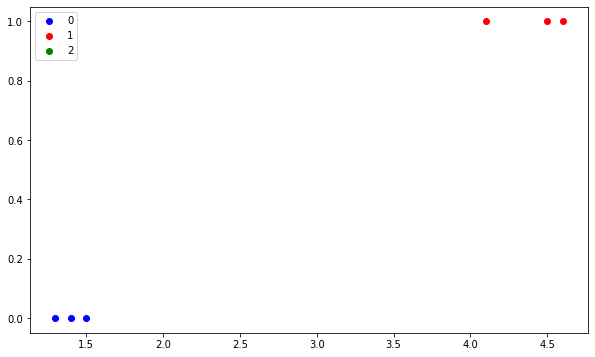

In [2]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype = None, delimiter = ',', skip_header = 1)
X = iris[:, 0:1]
y = iris[:,1]

# change data type
y = y.astype('uint8') # ep ve kieu int xiu nua lam gia tri index
print('X:\n', X)
print('y:\n',y)
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],y[y==0],color='b',label='0')
plt.scatter(X[y==1][:,0],y[y==1],color='r',label='1')
plt.scatter(X[y==2][:,0],y[y==2],color='g',label='2')
plt.legend()
plt.show()

In [3]:
N = 6 # number of samples
k = 2 # number of classes

# one hot
import numpy as np
def convert_one_hot(y,k):
    one_hot = np.zeros((len(y),k))
    one_hot[np.arange(len(y)),y] = 1
    return one_hot
y_one_hot = convert_one_hot(y,k)
print("one_hot\n",y_one_hot)

intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept,X), axis = 1)
print('X\n',X)

one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [4]:
# initialize parameters
theta = np.array([[0.1,0.05],[0.2,-0.1]])
print('theta\n', theta)

theta
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


In [6]:
# some parameters
learning_rate = 0.1
losses = []
num_iter = 100
for epoch in range(num_iter):
    # compute z
    z = X.dot(theta)
    # compute y_hat
    exp_z = np.exp(z)
    y_hat = exp_z/np.sum(exp_z, axis = 1, keepdims = True) # axis tinh tong theo dong
    # compute the loss
    loss = -np.log(np.sum(y_hat*y_one_hot, axis = 1))
    losses.append(np.sum(loss))
    #compute the gradient dz
    dz = y_hat - y_one_hot
    # compute theta
    dtheta = X.T.dot(dz)
    theta = theta - learning_rate*dtheta

In [7]:
theta

array([[ 3.10740201, -2.95740201],
       [-1.09140016,  1.19140016]])

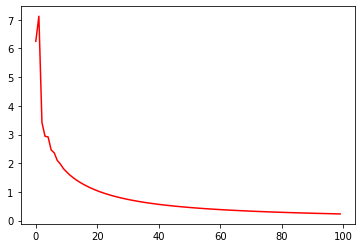

In [8]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color = 'r')
plt.show()

In [10]:
# lay data

print(X)

[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [11]:
print(y)

[0 0 0 1 1 1]


In [15]:
# test model
z = X.dot(theta)
exp_z = np.exp(z)
y_hat = exp_z/np.sum(exp_z, axis=0)
print(y_hat)

# do tin cay y_hat [0] thuoc nhom 0 = 94%
# nhom 1 = 0.05%

[[0.31961226 0.00881809]
 [0.35646947 0.00782767]
 [0.28656591 0.00993382]
 [0.01084569 0.35430046]
 [0.01678236 0.2199907 ]
 [0.0097243  0.39912927]]


In [14]:
predicted_class = np.argmax(y_hat, axis=1) # np.argmax lay vi tri index ma cho do co gia tri lon nhat
print(predicted_class)

[0 0 0 1 1 1]
